# Acoustic Extinguisher Fire Dataset

### DESCRIPTION:

The dataset was obtained as a result of the extinguishing tests of four different fuel flames with a sound wave extinguishing system. The sound wave fire-extinguishing system consists of 4 subwoofers with a total power of 4,000 Watt placed in the collimator cabinet. There are two amplifiers that enable the sound come to these subwoofers as boosted. Power supply that powers the system and filter circuit ensuring that the sound frequencies are properly transmitted to the system is located within the control unit. While computer is used as frequency source, anemometer was used to measure the airflow resulted from sound waves during the extinguishing phase of the flame, and a decibel meter to measure the sound intensity. An infrared thermometer was used to measure the temperature of the flame and the fuel can, and a camera is installed to detect the extinction time of the flame. A total of 17,442 tests were conducted with this experimental setup.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading and Viewing the Data

In [2]:
d1=pd.read_excel("Acoustic.xlsx")

In [3]:
d1

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


## Shape of the Data

In [4]:
d1.shape

(17442, 7)

## To Check Datatypes

In [5]:
d1.dtypes

SIZE           int64
FUEL          object
DISTANCE       int64
DESIBEL        int64
AIRFLOW      float64
FREQUENCY      int64
STATUS         int64
dtype: object

## Exploring data

In [6]:
d1['FUEL'].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

In [7]:
d1['FUEL'].value_counts()

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
d = OrdinalEncoder()
d1['FUEL'] = d.fit_transform(d1[['FUEL']])

In [10]:
d1.dtypes

SIZE           int64
FUEL         float64
DISTANCE       int64
DESIBEL        int64
AIRFLOW      float64
FREQUENCY      int64
STATUS         int64
dtype: object

In [11]:
d1['STATUS'].value_counts()

0    8759
1    8683
Name: STATUS, dtype: int64

## To check null values

In [12]:
d1.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

## To check basic info

In [13]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  float64
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 954.0 KB


## To check Statistical info

In [14]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
SIZE,17442.0,3.411765,1.750977,1.0,2.0,3.0,5.0,7.0
FUEL,17442.0,1.411765,1.191120,0.0,0.0,1.0,3.0,3.0
DISTANCE,17442.0,100.000000,54.773826,10.0,50.0,100.0,150.0,190.0
DESIBEL,17442.0,96.379142,8.164096,72.0,90.0,95.0,104.0,113.0
AIRFLOW,17442.0,6.975634,4.736169,0.0,3.2,5.8,11.2,17.0
FREQUENCY,17442.0,31.611111,20.939149,1.0,14.0,27.5,47.0,75.0
STATUS,17442.0,0.497821,0.500010,0.0,0.0,0.0,1.0,1.0


## Correlation and Covariance

In [15]:
d1.corr()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000e+00,1.161420e-01,-2.437871e-15,-6.125585e-15,1.677898e-16,9.978281e-17,-0.096947
FUEL,1.161420e-01,1.000000e+00,-5.956652e-16,-1.383383e-14,-8.832434e-16,-1.081887e-15,-0.019384
DISTANCE,-2.437871e-15,-5.956652e-16,1.000000e+00,-2.385897e-01,-7.074906e-01,-2.452947e-17,-0.644051
DESIBEL,-6.125585e-15,-1.383383e-14,-2.385897e-01,1.000000e+00,3.769153e-01,5.617409e-01,0.203970
AIRFLOW,1.677898e-16,-8.832434e-16,-7.074906e-01,3.769153e-01,1.000000e+00,-2.120462e-01,0.760628
FREQUENCY,9.978281e-17,-1.081887e-15,-2.452947e-17,5.617409e-01,-2.120462e-01,1.000000e+00,-0.244203
STATUS,-9.694718e-02,-1.938442e-02,-6.440506e-01,2.039698e-01,7.606279e-01,-2.442030e-01,1.000000


In [16]:
d1.cov()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,3.065920e+00,2.422284e-01,2.044160e-14,-2.476979e-16,-7.822040e-16,-1.770280e-16,-0.084878
FUEL,2.422284e-01,1.418766e+00,2.513482e-14,-3.813245e-16,1.140714e-16,-9.658456e-17,-0.011545
DISTANCE,2.044160e-14,2.513482e-14,3.000172e+03,-1.066923e+02,-1.835359e+02,1.037093e-13,-17.638897
DESIBEL,-2.476979e-16,-3.813245e-16,-1.066923e+02,6.665247e+01,1.457401e+01,9.602917e+01,0.832630
AIRFLOW,-7.822040e-16,1.140714e-16,-1.835359e+02,1.457401e+01,2.243130e+01,-2.102891e+01,1.801266
FREQUENCY,-1.770280e-16,-9.658456e-17,1.037093e-13,9.602917e+01,-2.102891e+01,4.384480e+02,-2.556750
STATUS,-8.487776e-02,-1.154480e-02,-1.763890e+01,8.326304e-01,1.801266e+00,-2.556750e+00,0.250010


## Data Visualization

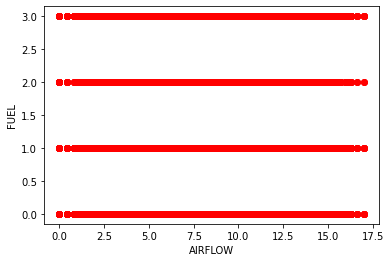

In [17]:
plt.scatter(data=d1,x='AIRFLOW',y='FUEL',color='Red')
plt.ylabel('FUEL')
plt.xlabel('AIRFLOW')
plt.show()

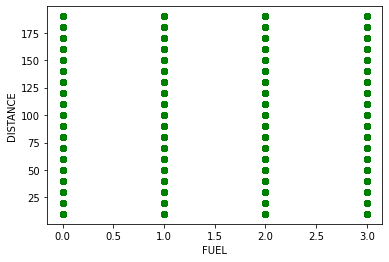

In [18]:
plt.scatter(data=d1,y='DISTANCE',x='FUEL',color='Green')
plt.xlabel('FUEL')
plt.ylabel('DISTANCE')
plt.show()

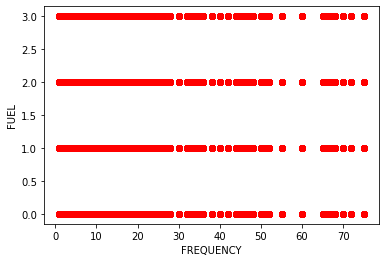

In [19]:
plt.scatter(data=d1,x='FREQUENCY',y='FUEL',color='Red')
plt.ylabel('FUEL')
plt.xlabel('FREQUENCY')
plt.show()

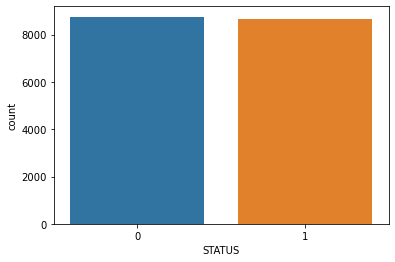

In [20]:
sns.countplot(d1['STATUS'], label="Value Count")
plt.show()

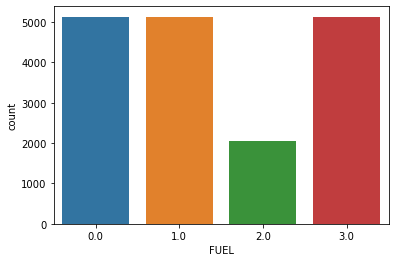

In [21]:
sns.countplot(d1['FUEL'], label="Value Count")
plt.show()

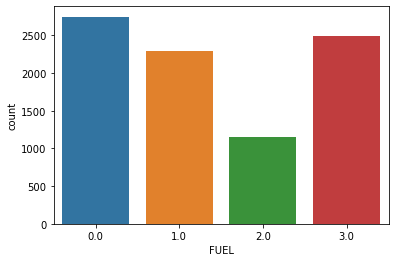

In [22]:
sns.countplot(d1.FUEL.loc[d1['STATUS'] == 1], label="Value Count")
plt.show()

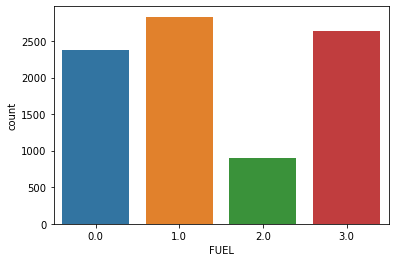

In [23]:
sns.countplot(d1.FUEL.loc[d1['STATUS'] == 0], label="Value Count")
plt.show()

**Gasoline has the higher count when 'STATUS' is 1** 

**kerosene has the higher count when 'STATUS' is 0**

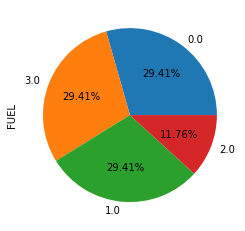

In [24]:
d1['FUEL'].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

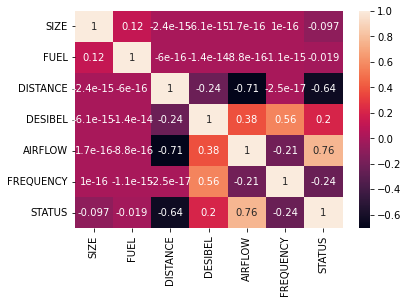

In [25]:
plt.figure()
sns.heatmap(d1.corr(),annot=True)
plt.show()

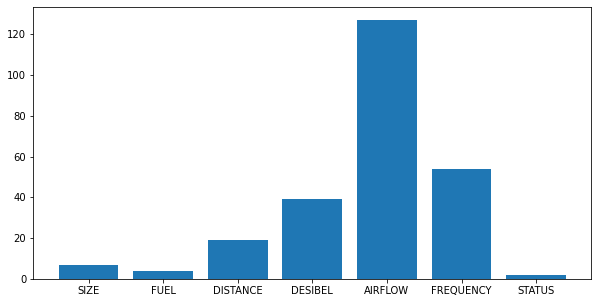

In [26]:
plt.figure(figsize=(10,5))
plt.bar(d1.columns,d1.nunique())
plt.show()

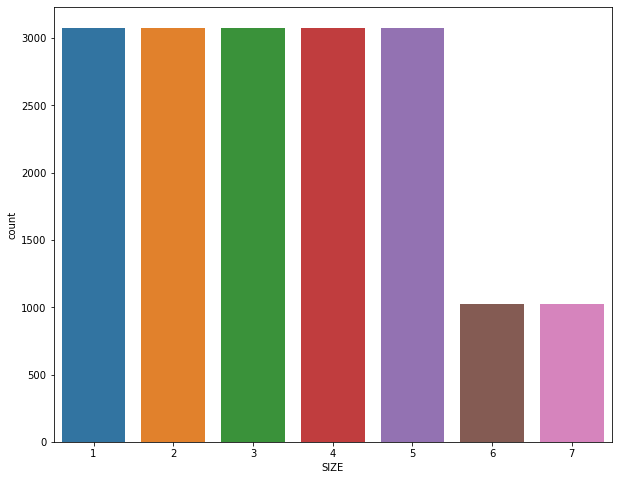

In [27]:
plt.figure(figsize=[10, 8])
sns.countplot(d1['SIZE'])
plt.show()

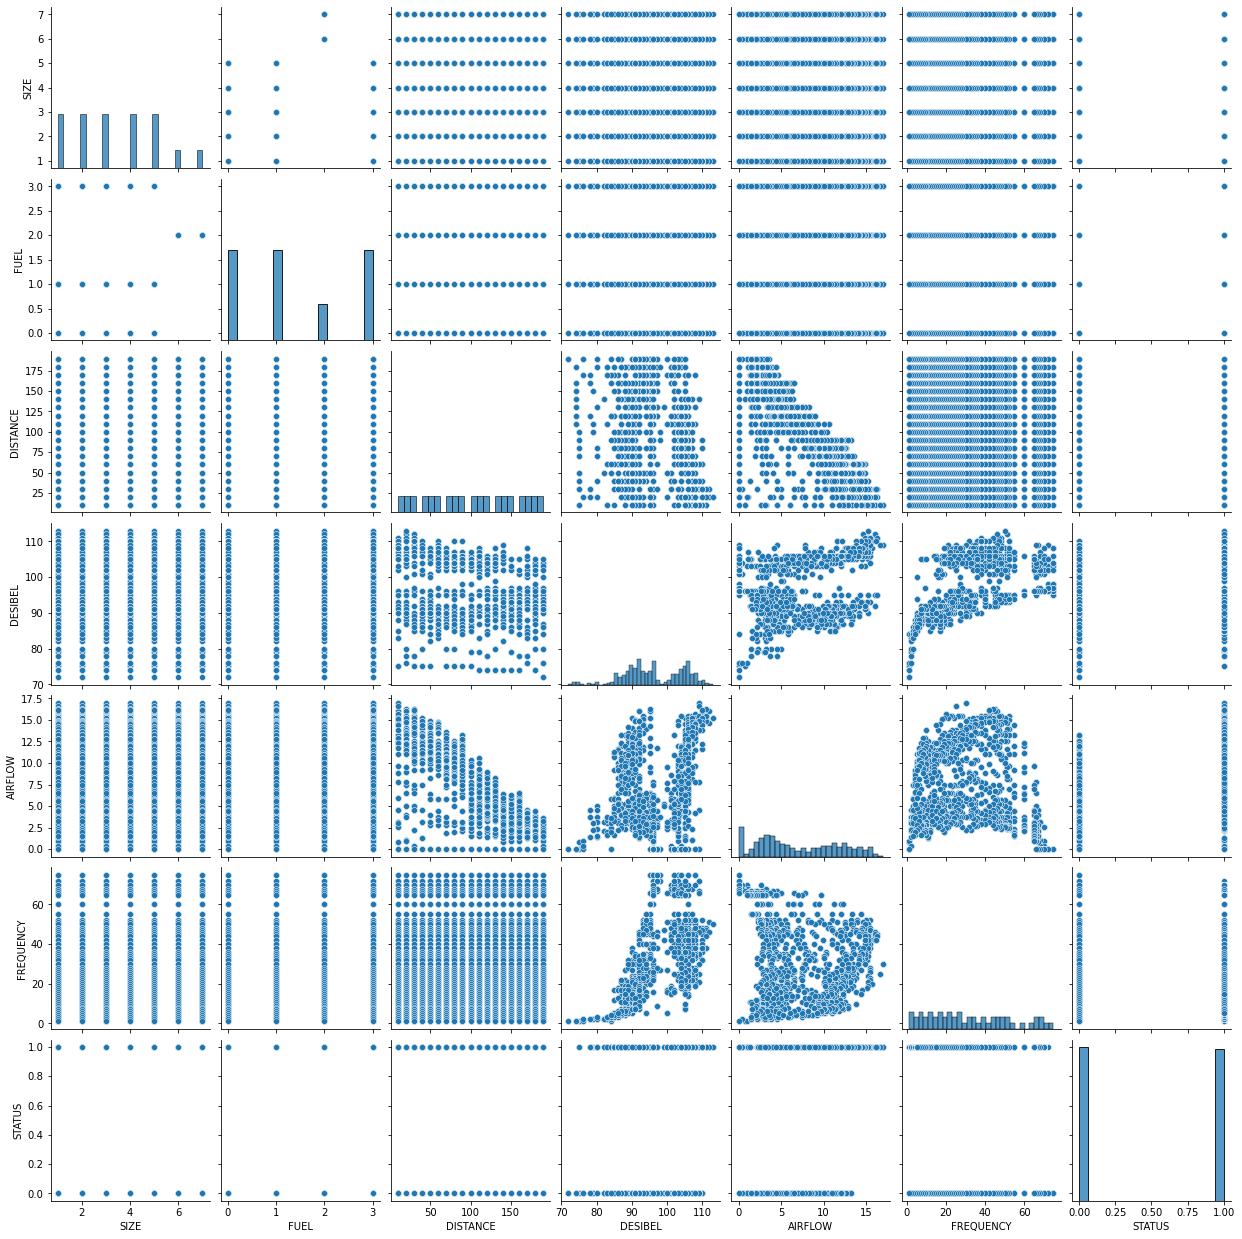

In [28]:
sns.pairplot(d1)
plt.show()

In [29]:
from scipy.stats import skew

SIZE


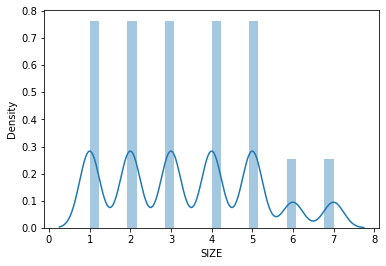

FUEL


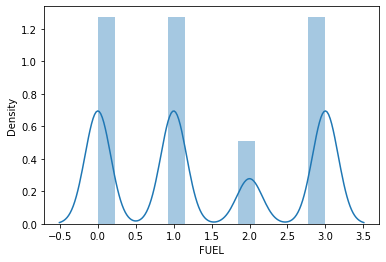

DISTANCE


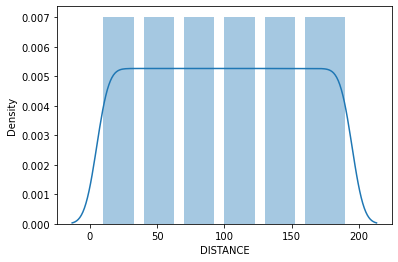

DESIBEL


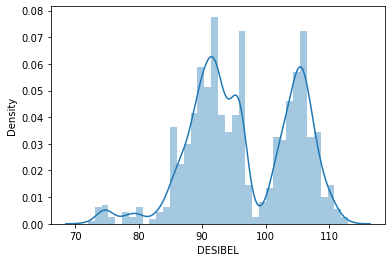

AIRFLOW


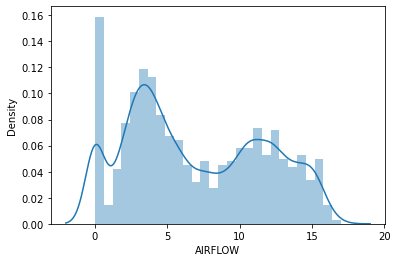

FREQUENCY


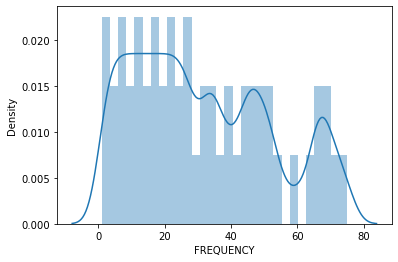

STATUS


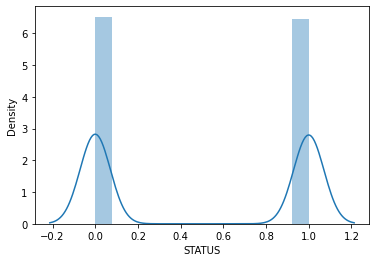

In [30]:
for col in d1:
    print(col)
    plt.figure()
    sns.distplot(d1[col])
    plt.show()

## Train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x=d1.drop(['STATUS'],axis=1)
x

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0.0,10,96,0.0,75
1,1,0.0,10,96,0.0,72
2,1,0.0,10,96,2.6,70
3,1,0.0,10,96,3.2,68
4,1,0.0,10,109,4.5,67
...,...,...,...,...,...,...
17437,7,2.0,190,86,2.2,5
17438,7,2.0,190,84,2.0,4
17439,7,2.0,190,80,1.5,3
17440,7,2.0,190,76,0.4,2


In [33]:
y=d1.STATUS
y

0        0
1        1
2        1
3        1
4        1
        ..
17437    0
17438    0
17439    0
17440    0
17441    0
Name: STATUS, Length: 17442, dtype: int64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
model.score(x_test,y_test)

0.8734235267140564

In [39]:
y_predict=model.predict(x_test)
y_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Accuracy score

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,y_predict)

0.8734235267140564

## Confusion matrix & Report

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
per0=confusion_matrix(y_test,y_predict)
per0

array([[1947,  247],
       [ 305, 1862]], dtype=int64)

In [44]:
from sklearn.metrics import plot_confusion_matrix

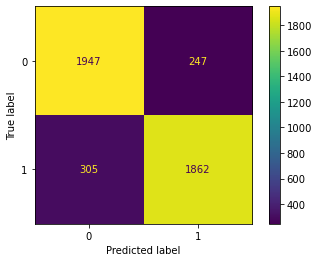

In [45]:
plot_confusion_matrix(model,x_test,y_test)

In [46]:
from sklearn.metrics import classification_report

In [47]:
p_rep0=classification_report(y_test,y_predict)
print(p_rep0)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2194
           1       0.88      0.86      0.87      2167

    accuracy                           0.87      4361
   macro avg       0.87      0.87      0.87      4361
weighted avg       0.87      0.87      0.87      4361



## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model=RandomForestClassifier()

In [50]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
model.score(x_test,y_test)

0.9644576931896354

In [52]:
y_predict=model.predict(x_test)
y_predict

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

## Accuracy score

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,y_predict)

0.9644576931896354

## Confusion matrix & Report

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
per=confusion_matrix(y_test,y_predict)
per

array([[2115,   79],
       [  76, 2091]], dtype=int64)

In [57]:
from sklearn.metrics import plot_confusion_matrix

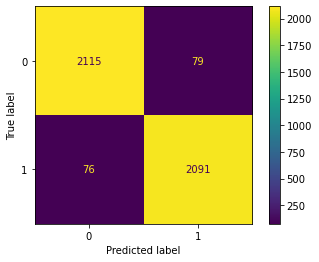

In [58]:
plot_confusion_matrix(model,x_test,y_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
p_rep=classification_report(y_test,y_predict)
print(p_rep)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2194
           1       0.96      0.96      0.96      2167

    accuracy                           0.96      4361
   macro avg       0.96      0.96      0.96      4361
weighted avg       0.96      0.96      0.96      4361



## Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
d1["STATUS"] = d1["STATUS"].replace({1:"yes",0:"No"})

In [63]:
d1

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0.0,10,96,0.0,75,No
1,1,0.0,10,96,0.0,72,yes
2,1,0.0,10,96,2.6,70,yes
3,1,0.0,10,96,3.2,68,yes
4,1,0.0,10,109,4.5,67,yes
...,...,...,...,...,...,...,...
17437,7,2.0,190,86,2.2,5,No
17438,7,2.0,190,84,2.0,4,No
17439,7,2.0,190,80,1.5,3,No
17440,7,2.0,190,76,0.4,2,No


In [64]:
model=DecisionTreeClassifier()

In [65]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
model.score(x_test,y_test)

0.9628525567530383

In [67]:
y_predict=model.predict(x_test)
y_predict

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

## Accuracy score

In [68]:
accuracy_score(y_test,y_predict)

0.9628525567530383

## Confusion matrix & Report

In [69]:
per1=confusion_matrix(y_test,y_predict)
per1

array([[2105,   89],
       [  73, 2094]], dtype=int64)

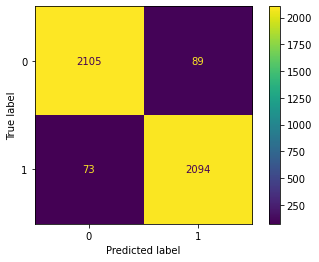

In [70]:
plot_confusion_matrix(model,x_test,y_test)

In [71]:
p_rep1=classification_report(y_test,y_predict)
print(p_rep1)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2194
           1       0.96      0.97      0.96      2167

    accuracy                           0.96      4361
   macro avg       0.96      0.96      0.96      4361
weighted avg       0.96      0.96      0.96      4361



## K Neighbors Classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
model = KNeighborsClassifier()

In [74]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
model.score(x_test,y_test)

0.9183673469387755

In [76]:
y_predict=model.predict(x_test)
y_predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Accuracy score

In [77]:
accuracy_score(y_test,y_predict)

0.9183673469387755

## Confusion matrix & Report

In [78]:
per2=confusion_matrix(y_test,y_predict)
per2

array([[2032,  162],
       [ 194, 1973]], dtype=int64)

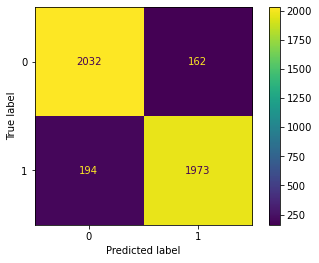

In [79]:
plot_confusion_matrix(model,x_test,y_test)

In [80]:
p_rep2=classification_report(y_test,y_predict)
print(p_rep2)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2194
           1       0.92      0.91      0.92      2167

    accuracy                           0.92      4361
   macro avg       0.92      0.92      0.92      4361
weighted avg       0.92      0.92      0.92      4361



## Support vector classifier

In [81]:
from sklearn.svm import SVC

In [82]:
model = SVC()

In [83]:
model.fit(x_train,y_train)

SVC()

In [84]:
model.score(x_test,y_test)

0.8867232286172896

In [85]:
y_predict=model.predict(x_test)
y_predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

## Accuracy score

In [86]:
accuracy_score(y_test,y_predict)

0.8867232286172896

## Confusion matrix & Report

In [87]:
per3=confusion_matrix(y_test,y_predict)
per3

array([[1980,  214],
       [ 280, 1887]], dtype=int64)

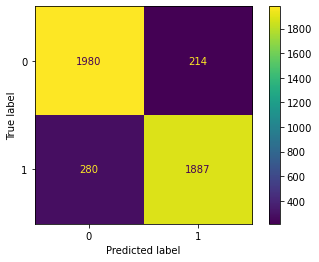

In [88]:
plot_confusion_matrix(model,x_test,y_test)

In [89]:
p_rep3=classification_report(y_test,y_predict)
print(p_rep3)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2194
           1       0.90      0.87      0.88      2167

    accuracy                           0.89      4361
   macro avg       0.89      0.89      0.89      4361
weighted avg       0.89      0.89      0.89      4361



## GaussianNB

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
model = GaussianNB()

In [92]:
model.fit(x_train,y_train)

GaussianNB()

In [93]:
model.score(x_test,y_test)

0.8679202017885806

In [94]:
y_predict=model.predict(x_test)
y_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Accuracy score

In [95]:
accuracy_score(y_test,y_predict)

0.8679202017885806

## Confusion matrix & Report

In [96]:
per4=confusion_matrix(y_test,y_predict)
per4

array([[1955,  239],
       [ 337, 1830]], dtype=int64)

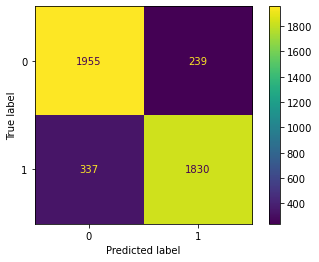

In [97]:
plot_confusion_matrix(model,x_test,y_test)

In [98]:
p_rep4=classification_report(y_test,y_predict)
print(p_rep4)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2194
           1       0.88      0.84      0.86      2167

    accuracy                           0.87      4361
   macro avg       0.87      0.87      0.87      4361
weighted avg       0.87      0.87      0.87      4361



## bagging using cross_vall_score

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
from sklearn.ensemble import BaggingClassifier

In [101]:
bg0 = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=1)
bg0cv=np.mean(cross_val_score(bg0,x_train,y_train,cv=5))
bg0cv

0.8763095392511209

In [102]:
bg1 = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=1)
bg1cv=np.mean(cross_val_score(bg1,x_train,y_train,cv=5))
bg1cv

0.957342779918178

In [103]:
bg2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=1)
bg2cv=np.mean(cross_val_score(bg2,x_train,y_train,cv=5))
bg2cv

0.9672807998513602

In [104]:
bg3 = BaggingClassifier(base_estimator=SVC(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=1)
bg3cv=np.mean(cross_val_score(bg3,x_train,y_train,cv=5))
bg3cv

0.8876999540758554

In [105]:
bg4 = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=1)
bg4cv=np.mean(cross_val_score(bg4,x_train,y_train,cv=5))
bg4cv

0.9139975448695251

In [106]:
bg5 = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=1)
bg5cv=np.mean(cross_val_score(bg5,x_train,y_train,cv=5))
bg5cv

0.8714932884141448

 From the above models Best Model is RandomForestClassifier and the Accuracy of model is 0.96